In [8]:
import numpy as np
import matplotlib as plt
%matplotlib inline
import pylab
import nest

In [9]:
# Create 2 populations of 6 sensory neurons each
ndict = {"I_e": 0.0, "tau_m": 20.0} 
# Is the value of tau_m a good one? Should we use a different neuron model?
#nest.SetDefaults("iaf_psc_alpha", ndict)
SensoryNeurons1 = nest.Create("iaf_psc_alpha", 6, ndict)
SensoryNeurons2 = nest.Create("iaf_psc_alpha", 6)
#nest.GetStatus(SensoryNeurons1)

# Create a population of 6 motor neurons
MotorNeurons = nest.Create("iaf_psc_alpha", 6)

In [14]:
ndict["model"]

KeyError: 'model'

In [3]:
# Create a multimeter for each population of neurons
multimeter_dict = {"withtime":True, "record_from":["V_m"]}
multimeter_S1 = nest.Create("multimeter", 6, multimeter_dict)
multimeter_S2 = nest.Create("multimeter", 6, multimeter_dict)
multimeter_M = nest.Create("multimeter", 6, multimeter_dict)
#nest.GetStatus(multimeter_S1)

# Create a spike detector for each population of neurons
spikeDetector_dict = {"withgid": True, "withtime": True}
spikeDetector_S1 = nest.Create("spike_detector", params=spikeDetector_dict)
spikeDetector_S2 = nest.Create("spike_detector", params=spikeDetector_dict)
spikeDetector_M = nest.Create("spike_detector", params=spikeDetector_dict)
#nest.GetStatus(spikeDetector_M)

# Connect multimeters and spikeDetectors
nest.Connect(multimeter_S1, SensoryNeurons1)
nest.Connect(multimeter_S2, SensoryNeurons2)
nest.Connect(multimeter_M, MotorNeurons)

nest.Connect(SensoryNeurons1, spikeDetector_S1)
nest.Connect(SensoryNeurons2, spikeDetector_S2)
nest.Connect(MotorNeurons, spikeDetector_M)

In [4]:
# Create synapses and connect neuron populations
synapse_dict = {"model": "stdp_synapse"}#, 
            #"alpha": {"distribution": "uniform", "low": alpha_min, "high": alpha_max},
            #"weight": {"distribution": "uniform", "low": w_min, "high": w_max},
            #"delay": 1.0}
nest.Connect(SensoryNeurons1, MotorNeurons, "all_to_all", synapse_dict)
nest.Connect(SensoryNeurons2, MotorNeurons, "all_to_all", synapse_dict)
#nest.GetConnections(target=MotorNeurons)
#nest.GetConnections(synapse_model="stdp_synapse")

In [5]:
# Run simulation
nest.SetStatus(SensoryNeurons1, {"I_e": 7000.0})
nest.SetStatus(SensoryNeurons2, {"I_e": 8000.0})

nest.Simulate(100.0) # 100 ms

In [6]:
# Get values from multimeters
dmm = nest.GetStatus(multimeter_S1)[0]
Vms_S1 = dmm["events"]["V_m"]
ts_S1 = dmm["events"]["times"]

dmm = nest.GetStatus(multimeter_S2)[0]
Vms_S2 = dmm["events"]["V_m"]
ts_S2 = dmm["events"]["times"]

dmm = nest.GetStatus(multimeter_M)[0]
Vms_M = dmm["events"]["V_m"]
ts_M = dmm["events"]["times"]

# Get values from spike detectors
dSD = nest.GetStatus(spikeDetector_S1,keys="events")[0]
evs_S1 = dSD["senders"]
st_S1 = dSD["times"]

dSD = nest.GetStatus(spikeDetector_S2,keys="events")[0]
evs_S2 = dSD["senders"]
st_S2 = dSD["times"]

dSD = nest.GetStatus(spikeDetector_M,keys="events")[0]
evs_M = dSD["senders"]
st_M = dSD["times"]

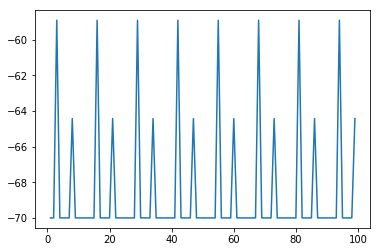

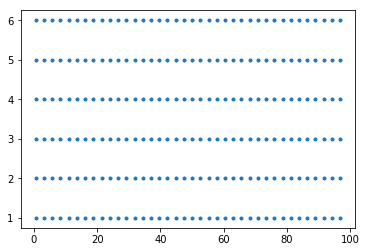

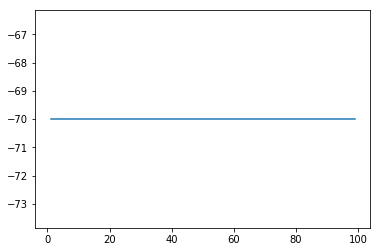

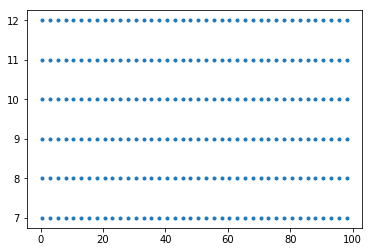

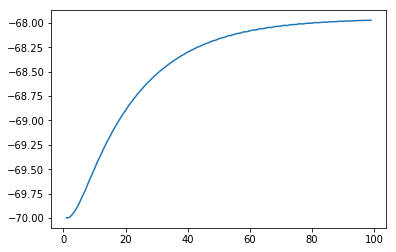

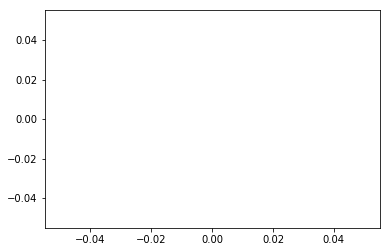

In [7]:
# Plot figures
pylab.figure(1)
pylab.plot(ts_S1, Vms_S1)
pylab.figure(2)
pylab.plot(st_S1, evs_S1, ".")
pylab.show()

pylab.figure(3)
pylab.plot(ts_S2, Vms_S2)
pylab.figure(4)
pylab.plot(st_S2, evs_S2, ".")
pylab.show()

pylab.figure(5)
pylab.plot(ts_M, Vms_M)
pylab.figure(6)
pylab.plot(st_M, evs_M, ".")
pylab.show()

In [ ]:
print(Vms_S1)